# Extraction of historical data Bitcoin

In [124]:
#pip install yfinance

In [125]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import json
from google.cloud import storage
import yaml

## Data download

[*********************100%***********************]  1 of 1 completed
Number of registers: 2734


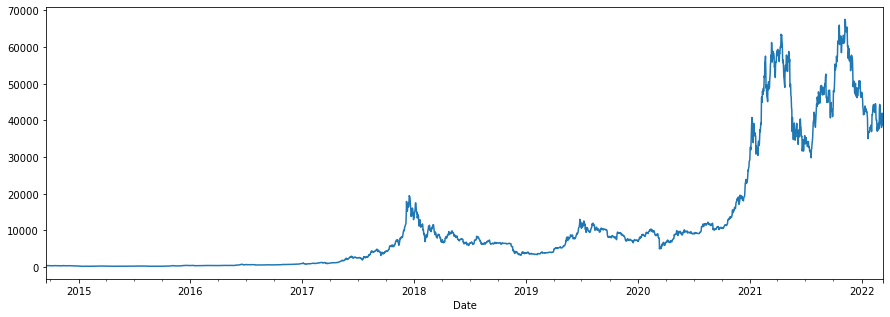

In [126]:
start = datetime(2013,1,1)
end = datetime.now().date().isoformat()
symbol = 'BTC-USD'

df = yf.download(symbol, start=start, end = end)
#df.to_csv('bitcoin_prueba.csv')

df['Adj Close'].plot(figsize=(15,5))
print('Number of registers:', len(df))

In [127]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-03-08,38059.902344,39304.441406,37957.386719,38737.269531,38737.269531,25776583476
2022-03-09,38742.816406,42465.671875,38706.093750,41982.925781,41982.925781,32284121034
2022-03-10,41974.070312,42004.726562,38832.941406,39437.460938,39437.460938,31078064711


In [128]:
df = df.reset_index(level=0)

In [129]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2729,2022-03-08,38059.902344,39304.441406,37957.386719,38737.269531,38737.269531,25776583476
2730,2022-03-09,38742.816406,42465.671875,38706.093750,41982.925781,41982.925781,32284121034
2731,2022-03-10,41974.070312,42004.726562,38832.941406,39437.460938,39437.460938,31078064711
2732,2022-03-11,39439.968750,40081.679688,38347.433594,38794.972656,38794.972656,26364890465


In [131]:
df.to_csv('bitcoin_prueba.csv')

## Bucket's Conection

In [ ]:
config_path = open("twitter_keys.yaml")
config = yaml.safe_load(config_path)
bucket = config['bucket']

client = storage.Client()
gcs_bucket = client.get_bucket(bucket)
print(bucket)

tweets_crypto


## Uploading File:

In [132]:
from google.cloud import storage


def upload_blob(bucket_name, source_file_name, destination_blob_name):
    """Uploads a file to the bucket."""
    # The ID of your GCS bucket
    # bucket_name = "your-bucket-name"
    # The path to your file to upload
    # source_file_name = "local/path/to/file"
    # The ID of your GCS object
    # destination_blob_name = "storage-object-name"

    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)

    blob.upload_from_filename(source_file_name)

    print(
        "File {} uploaded to {}.".format(
            source_file_name, destination_blob_name
        )
    )


In [133]:
upload_blob(bucket_name="tweets_crypto", source_file_name="bitcoin_prueba.csv", destination_blob_name="bitcoin_historical")

File bitcoin_prueba.csv uploaded to bitcoin_historical.


Sources:
- [Storage Upload File, Cloud](https://cloud.google.com/storage/docs/samples/storage-upload-file#storage_upload_file-python)
-#https://finance.yahoo.com/cryptocurrencies?guccounter=1 <- coins in yahoo
#https://www.youtube.com/watch?v=x58MJUVNKMg <- sourse of code